<a href="https://colab.research.google.com/github/abir-tcheir/testGit/blob/main/EfficientNet0B98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile
import datetime
from collections import Counter
 
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
 
from sklearn.model_selection import StratifiedShuffleSplit
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import models,layers
from tensorflow.keras.utils import plot_model
 
from keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam, schedules
 
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt
 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

Normal chest x-ray


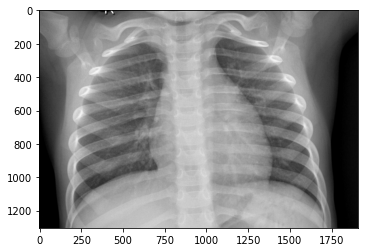

COVID chest x-ray


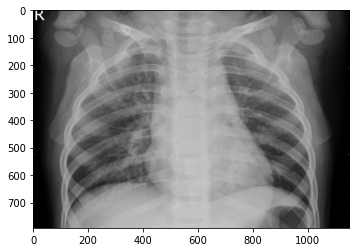

' \nprint("Viral Pneumonia chest x-ray")\nim = PIL.Image.open(os.path.join(img_path,\'Viral Pneumonia\',pneumonia_imgs[0]))\nplt.imshow(im,cmap="gray")\nplt.show()\n'

In [ ]:
img_path = '/content/drive/My Drive/datasetCOVIDB/'

 
covid_imgs = os.listdir(img_path+'/COVID')
normal_imgs = os.listdir(img_path+'/Non-COVID')
 
#covid_imgs = os.listdir(img_path+'/COVID')
#normal_imgs = os.listdir(img_path+'/Normal')
#pneumonia_imgs = os.listdir(img_path + '/Viral Pneumonia')
 
 
print("Normal chest x-ray")
im = PIL.Image.open(os.path.join(img_path,'Non-COVID',normal_imgs[0]))
plt.imshow(im,cmap="gray")
plt.show()
 
print("COVID chest x-ray")
im = PIL.Image.open(os.path.join(img_path,'COVID',covid_imgs[0]))
plt.imshow(im,cmap="gray")
plt.show()


''' 
print("Viral Pneumonia chest x-ray")
im = PIL.Image.open(os.path.join(img_path,'Viral Pneumonia',pneumonia_imgs[0]))
plt.imshow(im,cmap="gray")
plt.show()
'''

In [ ]:
list_files = []
for dir in os.listdir(img_path):
  aux_dir = os.path.join(img_path,dir)
  
  if os.path.isdir(aux_dir):
    for img in os.listdir(aux_dir):
      list_files.append([os.path.join(dir,img),dir])
df = pd.DataFrame(list_files, columns=['id','label'])
df.describe()

,id,label
count,9545,9545
unique,9545,2
top,COVID/person529_virus_1050.jpeg,Non-COVID
freq,1,5500


In [ ]:
def frequency_plot(df):
  freq_abs = Counter(df.label);
  freq_a = pd.DataFrame.from_dict(freq_abs, orient='index').reset_index()
 # total = len(df.index)
#  freq_r = freq_a[0]/total
 # freq_a[1] = freq_r
  freq_a.columns = ['Label','absolute frequency']
  return freq_a
frequency_plot(df)

,Label,absolute frequency
0,Non-COVID,5500
1,COVID,4045


In [ ]:
def split_dataset(df,test_size,random_state = 101):
  sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
  df = df.reset_index()
  for train_index, test_index in sss.split(df['id'], df['label']):
    X_train, X_test = df['id'][train_index], df['id'][test_index]
    y_train, y_test = df['label'][train_index], df['label'][test_index]
  traindf = pd.concat([X_train, y_train], axis=1)
  testdf = pd.concat([X_test, y_test], axis=1)
  return traindf,testdf
 
#divide train/val/test in 80/10/10
traindf,testdf = split_dataset(df,test_size = 0.25)
valdf,testdf= split_dataset(testdf,test_size = 0.50)
# traindf = balance_dataset('COVID',df)
 
 
traindf.id = img_path + traindf.id
valdf.id = img_path + valdf.id
testdf.id = img_path + testdf.id

In [ ]:
frequency_plot(traindf)

,Label,absolute frequency
0,Non-COVID,4125
1,COVID,3033


In [ ]:
frequency_plot(valdf)

,Label,absolute frequency
0,Non-COVID,687
1,COVID,506


In [ ]:
frequency_plot(testdf)

,Label,absolute frequency
0,Non-COVID,688
1,COVID,506


In [ ]:
BATCH_SIZE = 50
#BATCH_SIZE = 3
IMAGE_SIZE = 224
input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)

In [ ]:
#BATCH_SIZE=50
 
"""
train_datagen = ImageDataGenerator(          
    rotation_range = 40,
    width_shift_range = 0.2,
  height_shift_range=0.2,
  shear_range = 0.2,
  zoom_range = 0.1,
  fill_mode = 'nearest',
)
"""
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
 
 
print("Creating train generator...")
train_generator = train_datagen.flow_from_dataframe(
    dataframe=traindf,
    #directory="COVID19",
    directory="datasetCOVIDB",
    x_col="id",
    y_col="label",
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    seed=5,
    shuffle=True,
    #class_mode="categorical",
    class_mode="binary",
    target_size=(IMAGE_SIZE,IMAGE_SIZE)
)
 
 
val_datagen = ImageDataGenerator(rescale=1./255)
 
test_generator = test_datagen.flow_from_dataframe(
    dataframe=testdf,
    directory="datasetCOVIDB",
    x_col="id",
    y_col="label",
    color_mode="rgb",
    seed=5,
    shuffle = False,
    #batch_size=BATCH_SIZE,
    batch_size=30,
    class_mode="binary",
    #class_mode="categorical",
    target_size=(IMAGE_SIZE,IMAGE_SIZE)
)
 
print("\nCreating val generator...")
val_generator = val_datagen.flow_from_dataframe(
    dataframe=valdf,
    directory="datasetCOVIDB",
    x_col="id",
    y_col="label",
    batch_size=5,
    #batch_size=BATCH_SIZE,
    color_mode="rgb",
    seed=5,
    shuffle=True,
    class_mode="binary",
    #class_mode="categorical",
    
    target_size=(IMAGE_SIZE,IMAGE_SIZE)
)

Creating train generator...


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 6 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 7152 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 1192 validated image filenames belonging to 2 classes.

Creating val generator...
Found 1193 validated image filenames belonging to 2 classes.


In [ ]:
!pip install -U git+https://github.com/qubvel/efficientnet

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-mjvwa8fv
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-mjvwa8fv
     |████████████████████████████████| 50 kB 5.1 MB/s 
  Created wheel for efficientnet: filename=efficientnet-1.1.1-py3-none-any.whl size=18447 sha256=538e298e20caffdc4bc113851f362c2dfdd51322dcd1e7cfaf90052d799a1cc2
  Stored in directory: /tmp/pip-ephem-wheel-cache-4mh39ylu/wheels/11/69/85/814d64d694c96db0eef17b718042d644a1e54f113920481920
Successfully built efficientnet


In [ ]:
import efficientnet.tfkeras as enet
base_model =enet.EfficientNetB0(include_top=False, input_shape=(224,224,3), pooling='avg', weights="imagenet",classes=2)
from keras.applications.resnet import ResNet50
 

#Freeze base convolutional layers
base_model.trainable = False
base_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
16818176/16804768 [==============================] - 0s 0us/step
Model: "efficientnet-b0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 11

In [ ]:
#from keras.layers import AveragePooling2D, BatchNormalization
from keras.regularizers import l1_l2
from keras.regularizers import l2
from keras.regularizers import l1
from keras.layers import Dropout
from keras.models import Model 
from keras.layers import Flatten 
from keras.layers import BatchNormalization
''' 
model = models.Sequential()
model.add(base_model)
 
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dropout(0.30))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dropout(0.30))
predictions=model.add(layers.Dense(2, activation='softmax'))
'''
x = base_model.output
x = Flatten()(x)

x = BatchNormalization()(x)
 
x = Dense(1024)(x)
x = Activation("relu")(x)
x = Dropout(0.3)(x)

x = BatchNormalization()(x)
 
x = Dense(1024)(x)
x = Activation("relu")(x)
x = Dropout(0.3)(x)

# Output layer
predictions = Dense(1, activation="sigmoid")(x)
 
model= Model(inputs = base_model.input, outputs = predictions)
#model.summary()

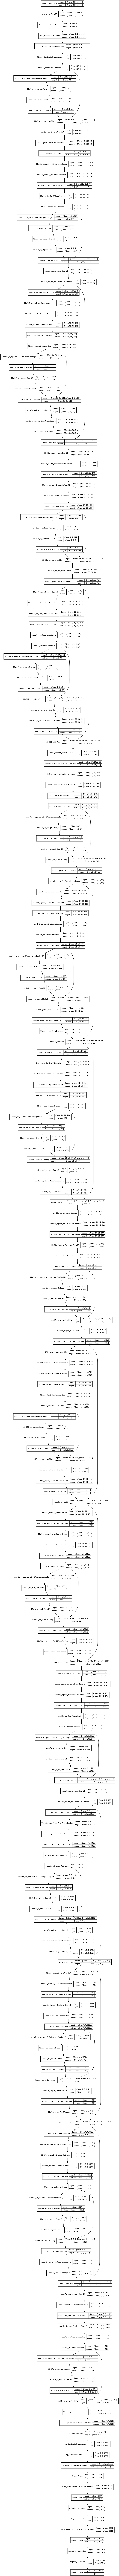

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True)
Image(filename='model.png')

In [ ]:
 
 
 #base_convnet.trainable=True 
EPOCHS =21
LEARNING_RATE = 1e-5
DECAY= LEARNING_RATE/EPOCHS
model.compile(
     loss='binary_crossentropy',
    #loss='categorical_crossentropy',
    # optimizer = tf.keras.optimizers.RMSprop(lr=2e-5),
     optimizer = tf.keras.optimizers.Nadam(lr=LEARNING_RATE),
     metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision(),
             'acc']
)
 
#callbacks = [model_checkpoint_callback,early,mcp_save]
history = model.fit_generator(
    train_generator,
    steps_per_epoch = BATCH_SIZE,
    epochs=EPOCHS,
    #callbacks=callbacks,
    validation_data = val_generator,
    validation_steps=BATCH_SIZE,
    verbose=1
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/21
50/50 [==============================] - 34s 623ms/step - loss: 0.0310 - recall_5: 0.9912 - precision_5: 0.9912 - acc: 0.9912 - val_loss: 0.0316 - val_recall_5: 0.9880 - val_precision_5: 0.9880 - val_acc: 0.9880
Epoch 2/21
50/50 [==============================] - 31s 617ms/step - loss: 0.0260 - recall_5: 0.9936 - precision_5: 0.9936 - acc: 0.9936 - val_loss: 0.0525 - val_recall_5: 0.9760 - val_precision_5: 0.9760 - val_acc: 0.9760
Epoch 3/21
50/50 [==============================] - 31s 621ms/step - loss: 0.0307 - recall_5: 0.9904 - precision_5: 0.9904 - acc: 0.9904 - val_loss: 0.0450 - val_recall_5: 0.9800 - val_precision_5: 0.9800 - val_acc: 0.9800
Epoch 4/21
50/50 [==============================] - 31s 611ms/step - loss: 0.0185 - recall_5: 0.9972 - precision_5: 0.9972 - acc: 0.9972 - val_loss: 0.0334 - val_recall_5: 0.9880 - val_precision_5: 0.9880 - val_acc: 0.9880
Epoch 5/21
50/50 [==============================] - 31s 616ms/step - loss: 0.0174 - recall_5: 0.9968 - preci

'\nacc=history.history[\'acc\'], label=\'train data\'\nval_acc=history.history[\'val_acc\']\nloss=history.history[\'loss\']\nval_loss=history.history[\'val_loss\']\n \nplt.plot( acc)\nplt.plot( val_acc)\n#plt.title(\'Training and validation accuracy\')\nplt.title(\'PretrainedResnet50 Train/Test Loss\')\nplt.ylabel(\'Loss\')\nplt.xlabel(\'Number of Epochs\')\nplt.legend(loc="upper left")\n \nplt.figure()\n'

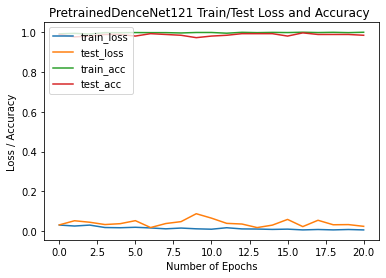

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
 
'''
 
plt.plot(history.history['loss'], label='train data')
plt.plot(history.history['val_loss'], label='test data')
plt.title('PretrainedResnet50 Train/Test Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(loc="upper left")
plt.show()
 
# Plot history: Accuracy
plt.plot(history.history['acc'], label='train data')
plt.plot(history.history['val_acc'], label='test data')
plt.title('PretrainedResnet50 Train/Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(loc="upper left")
plt.show()
'''
N = EPOCHS
#plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="test_acc")
plt.title("PretrainedDenceNet121 Train/Test Loss and Accuracy ")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss / Accuracy")
plt.legend(loc="upper left")
 
 
'''
acc=history.history['acc'], label='train data'
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
 
plt.plot( acc)
plt.plot( val_acc)
#plt.title('Training and validation accuracy')
plt.title('PretrainedResnet50 Train/Test Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(loc="upper left")
 
plt.figure()
'''

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[ 413   15]
 [  11 1103]]
classification_Report
              precision    recall  f1-score   support

       COVID       0.97      0.96      0.97       428
      NORMAL       0.99      0.99      0.99      1114

    accuracy                           0.98      1542
   macro avg       0.98      0.98      0.98      1542
weighted avg       0.98      0.98      0.98      1542



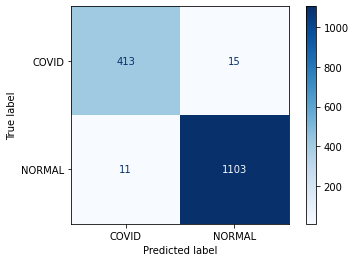

In [ ]:
# Confusion Matrix  & Pres  & Recall   & F1-Score
 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
 
target_names = ['COVID', 'NORMAL']
label_names = [0,1]
 
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred ,  axis = 1)
 
cm = confusion_matrix(test_generator.classes, y_pred, labels = label_names)
 
 
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
 
print('classification_Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))
 
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()